<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<p>
<h1>Algorísmica Avançada</h1>
<h2>Práctica 2: Greedy</h2>
</center>
</p>
</div>

<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>Minimum Spanning Tree</p></h2>
  <p>
Dado un grafo conexo y no dirigido, un minimum spanning tree de ese grafo es un subgrafo que tiene que ser un árbol y contener todos los vértices del grafo inicial. Cada arista tiene asignado un peso proporcional entre ellos, que es un número representativo de algún objeto, distancia, etc.; y se usa para asignar un peso total al MST computando la suma de todos los pesos de las aristas del árbol en cuestión. Un MST o un árbol expandido mínimo es un árbol recubridor que pesa menos o igual que otros árboles recubridores. Todo grafo tiene un bosque recubridor mínimo.
  </p>
  <p>
      En esta práctica se plantea la implementación del algoritmo de Prim para encontrar el arbol de expansión mínima en el metro de Londres.
  </p>
  </div>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center>
<p>
<h3>INPUT</h3>
<ul>
<li>__G__: El grafo del metro de londres.</li>
</ul>
<br>
<h3>OUTPUT</h3>

<ul>
<li>
__tree__: Objeto de tipo `Graph` que contenga el MST del grafo inical.
</li>
<ul>

</p>
</div>


In [1]:
from graph import Graph
from util import *
from heapq import*
G, lines = get_subway_graph('csv', Graph)

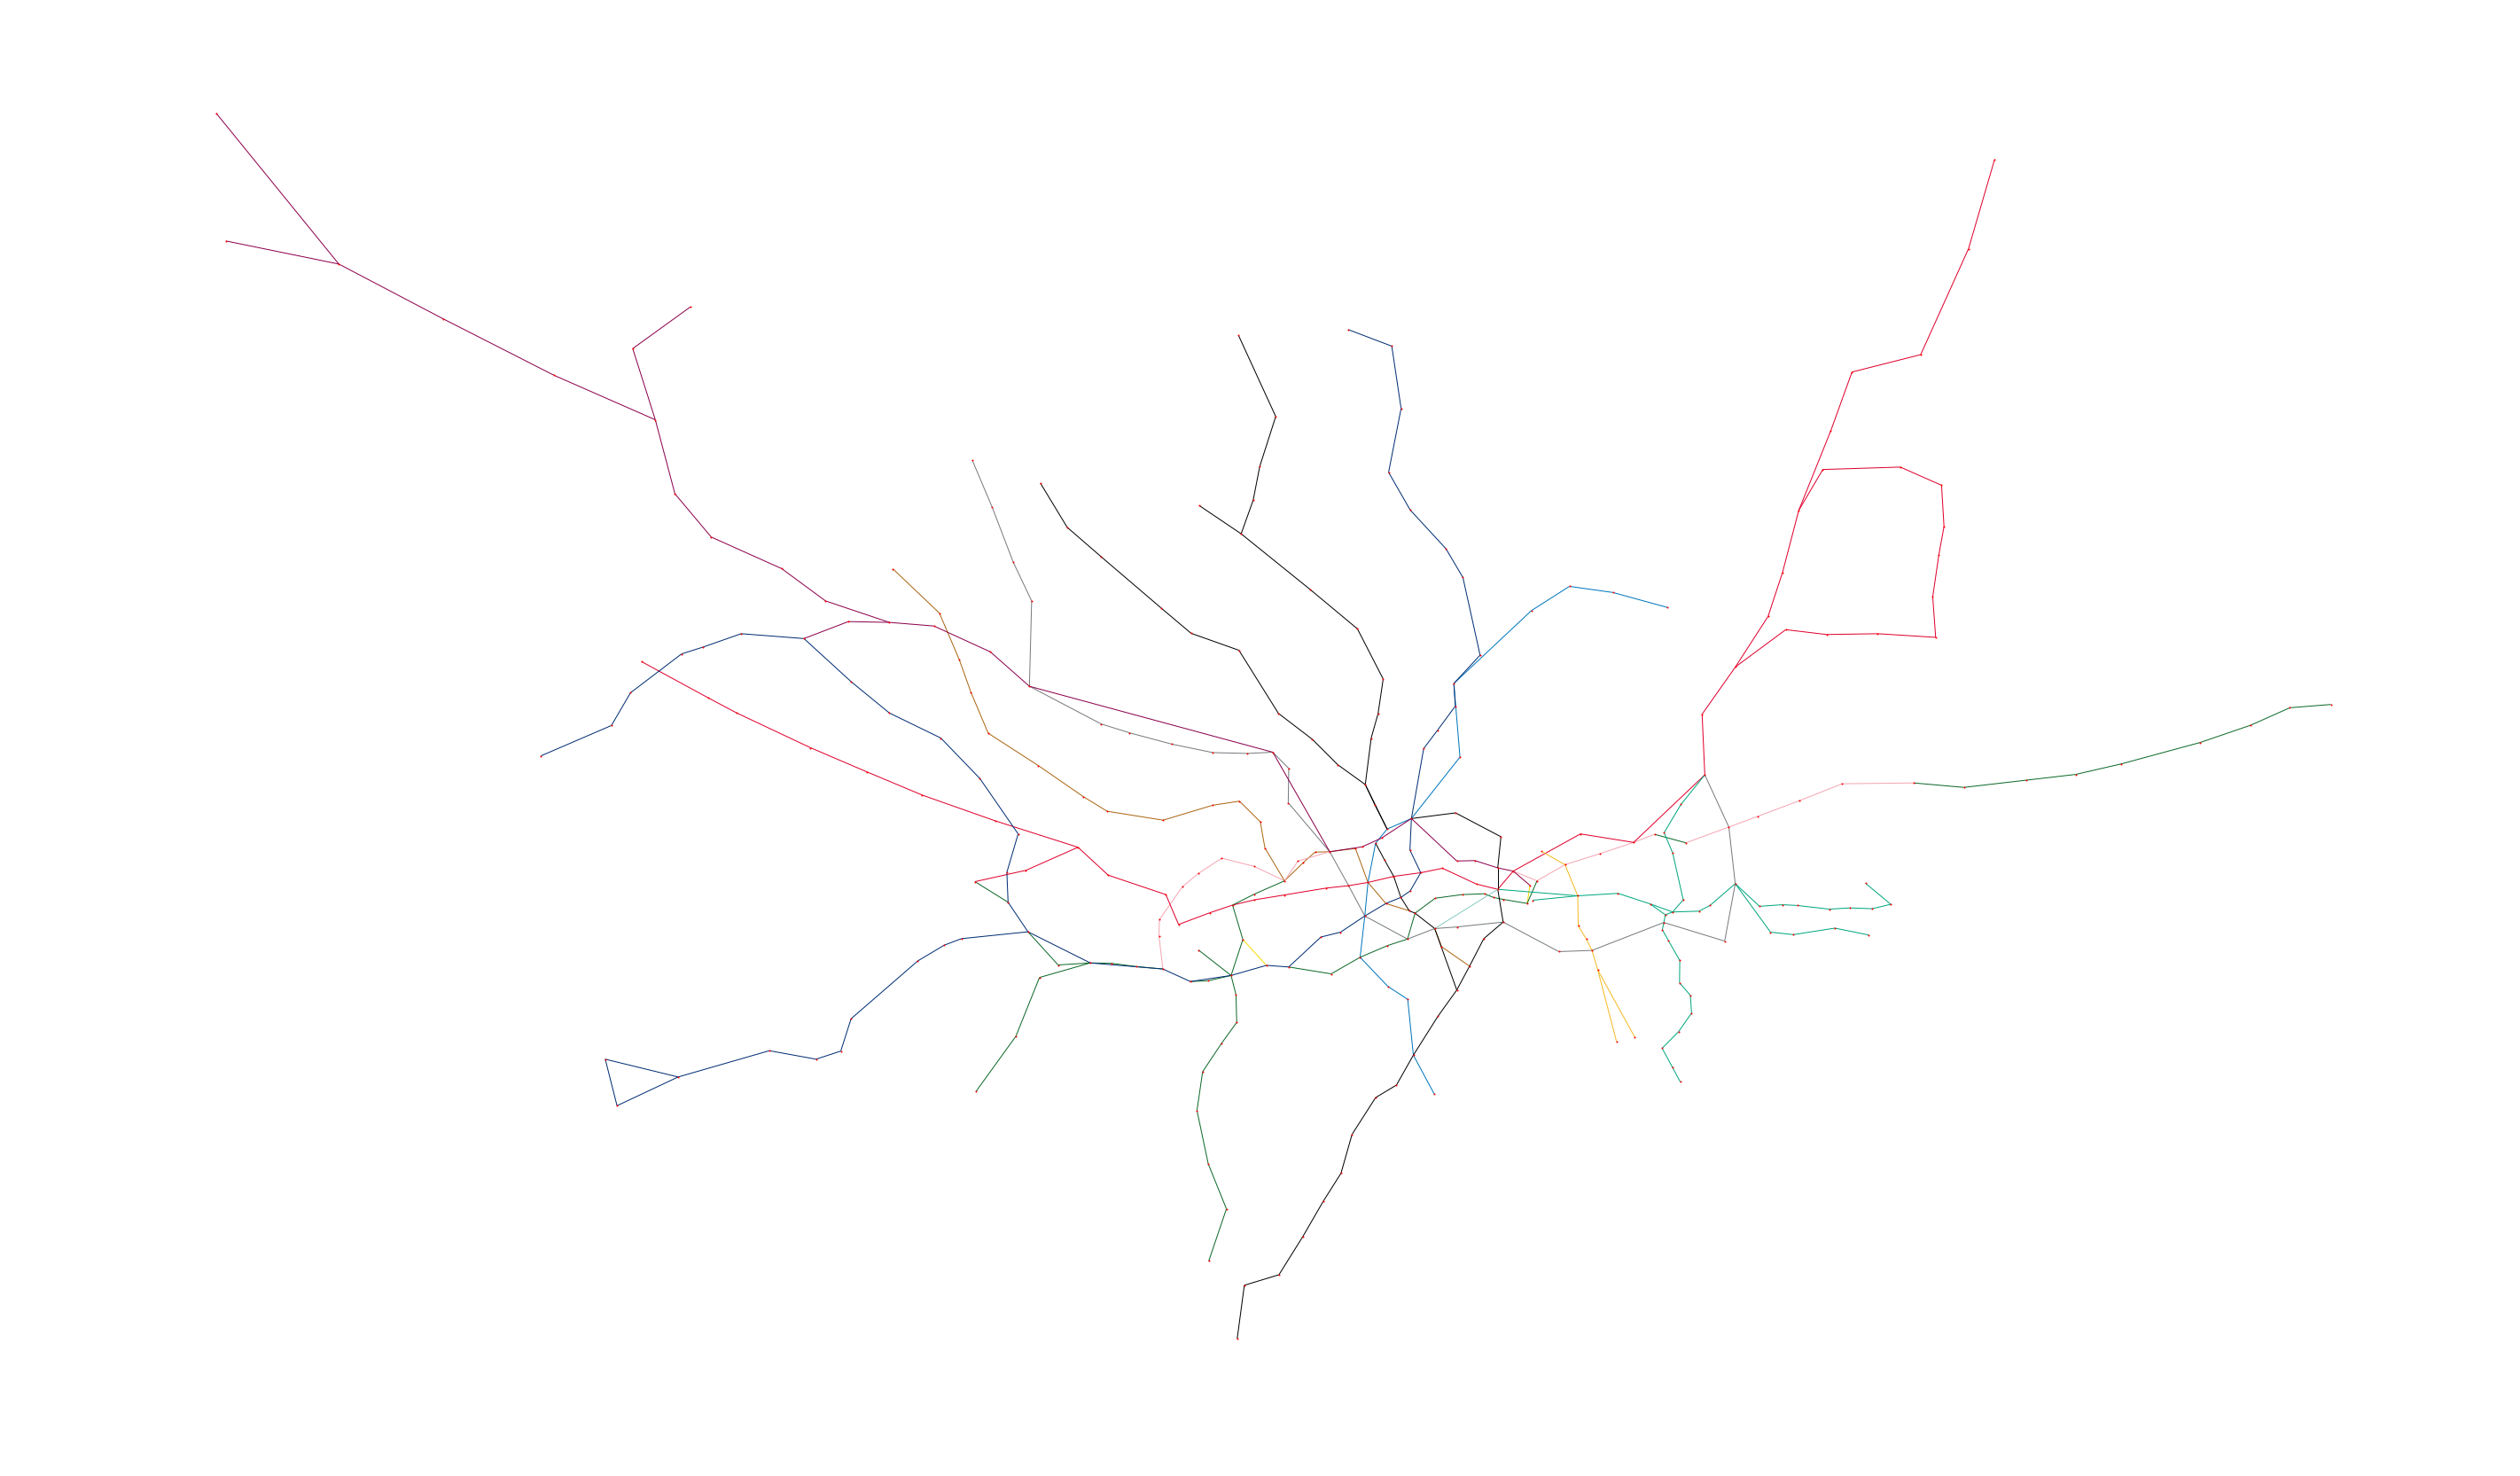

In [2]:
draw_subway_graph(G, lines, figsize=(50,30),  show_labels=False)

In [31]:
def prim(G, origin=None):
    """ Implementación del algoritmo de Prim para obtener el MST de un grafo cualquiera.
    Args:
        G (Graph): El grafo de tipo Graph sobre el que queremos buscar los componentes conexos
    Returns:
        tree: El grafo de tipo Graph que contiene el arbol de expansión mínima.
    """
    heap = []
    tree = Graph()
    if origin == None: origin = G.nodes()[0]
    heappush(heap,(0, origin,None))
    while heap:
        cost, node, prev = heappop(heap)
        if node not in tree.nodes():
            tree.add_node(node,G.node[node].copy())
            if prev: tree.add_edge(node, prev,G.edge[node][prev].copy())
            for item in G.neighbors(node): 
                if item not in tree.nodes(): heappush(heap,(G.edge[node][item]['distance'],item,node)) 
    return tree

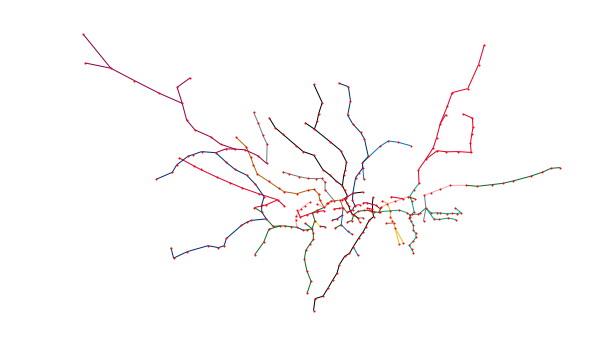

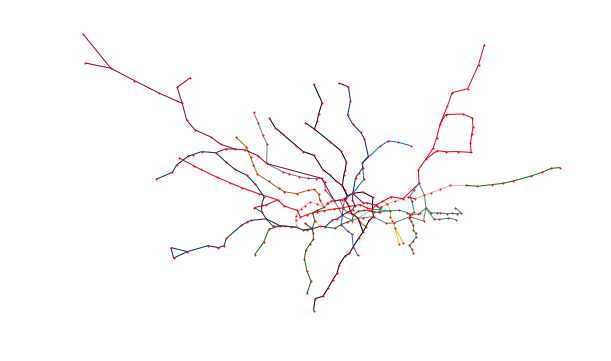

In [32]:
G, lines = get_subway_graph('csv', Graph)
D = prim(G)
draw_subway_graph(D, lines)
draw_subway_graph(G, lines)

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Tests </h3></p> </center>
<p>
Realiza los tests pertinentes en las celdas dispuestas a continuación.
</p>
</div>


In [26]:
import csv
import math
import matplotlib.pyplot as plt
import networkx as nx

In [27]:
def draw_graph(G, lines = None, figsize=(10,6), show_labels=False, edge_labels = False):
    plt.figure(figsize=figsize)
    plt.axis('off')
    
    G = graph2nx(G)
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, 
                           pos, 
                           node_size=500,
                          )
    if show_labels:
        nx.draw_networkx_labels(G,pos)
                               #,{x: G.node[x] for x in G.nodes()},font_size=4)
    if lines != None:
        for line in lines.keys():
            nx.draw_networkx_edges(
                G,
                pos,
                edgelist=[x for x in G.edges() if G.edge[x[0]][x[1]]['line'] == line],
                edge_color="#"+lines[line]['color'],
            )
    else:
        nx.draw_networkx_edges(
            G,
            pos,
            edgelist=[x for x in G.edges()],
            edge_color='r',
        )
    if edge_labels:
        edge_labels=dict([((u,v,),d['distance'])
                 for u,v,d in G.edges(data=True)])
        nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)

    plt.show()

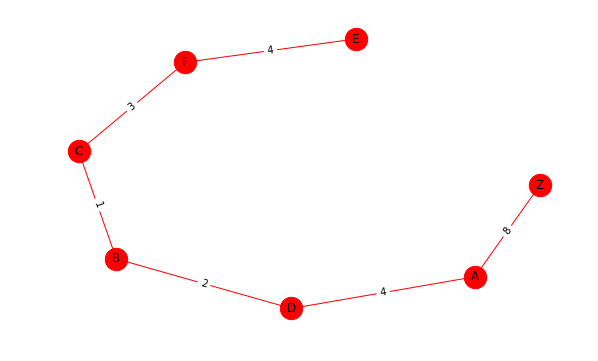

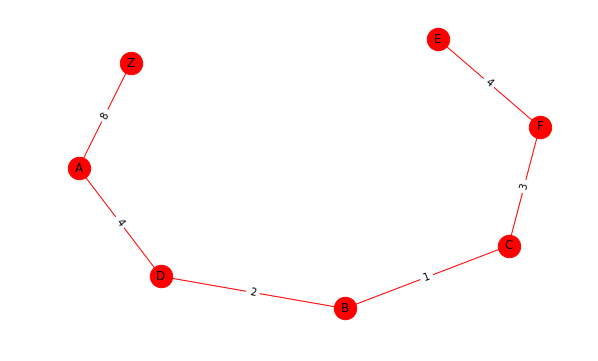

In [28]:
G = Graph()
G.add_node('A',attr_dict = {'prev':None})
G.add_node('B',attr_dict = {'prev':None})
G.add_node('C',attr_dict = {'prev':None})
G.add_node('D',attr_dict = {'prev':None})
G.add_node('E',attr_dict = {'prev':None})
G.add_node('F',attr_dict = {'prev':None})
G.add_node('Z',attr_dict = {'prev':None})
G.add_edge('A','B',attr_dict = {'distance':5})
G.add_edge('A','C',attr_dict = {'distance':6})
G.add_edge('A','D',attr_dict = {'distance':4})
G.add_edge('B','C',attr_dict = {'distance':1})
G.add_edge('B','D',attr_dict = {'distance':2})
G.add_edge('C','D',attr_dict = {'distance':2})
G.add_edge('C','E',attr_dict = {'distance':5})
G.add_edge('C','F',attr_dict = {'distance':3})
G.add_edge('D','F',attr_dict = {'distance':4})
G.add_edge('E','F',attr_dict = {'distance':4})
G.add_edge('A','Z',attr_dict = {'distance':8})
#draw_graph(G,show_labels=True, edge_labels= True)
H =prim1(G,'D')
F = prim1(G,'B')
draw_graph(H,show_labels=True, edge_labels= True)
draw_graph(F,show_labels=True, edge_labels= True)

<div class="alert alert-info">
<center>
  <h1>Comentarios</h1>
  <p>
  En esta sección tenéis que comentar brevemente (1) __cómo habéis realizado la implementación del algoritmo__ así como un (2) __análisis detallado de la complejidad__ del mismo.
  </p>
</center>
</div>

Primer de tot si no hem insertat el node origen, agafarem com a origen el primer de la llista de nodes que ens retorna el graf. L'afegim al heap, amb la distància, el value, a 0 i amb el prev que és None, ja que és el primer. Aleshores treiem el mínim del heap, l'afegim a l'arbre a retornar, comprovem si te prev, si el té afegim l'aresta al graf, i recorrem els veins, els afegim al heap, sempre que no els haguem afegit ja a l'arbre, amb la distància i el prev corresponents i així fins que es buidi el heap. Un cop acabat el bucle, retorem l'arbre.
La complexitat de prim és O(|v|log(|v|), ja que visitem tots els nodes i per trobar el mínim en un minheap la complexitat és log(n).

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
  <p>
  La entrega de esta práctica se realizará a través del __Campus Virtual__. En ella tenéis que incluir únicamente el fichero `.ipynb` sin comprimir con el código debidamente comentado y los comentarios que se os proponen en la anterior sección.
  </p>
  <p>
  El nombre del archivo ha de seguir el formato:
  </p><p style="text-align:center">
  ```
  <apellidos>_<nombre>_EP1.ipynb
  ```
  </p>
</center>
</div>